## Import Libraries

In [1]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import urllib2
import os
import re
import string
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk import bigrams
from collections import Counter
from collections import defaultdict

In [2]:
from gensim.corpora import Dictionary
from gensim.models.lsimodel import LsiModel
from gensim.models.ldamodel import LdaModel
from gensim.models.tfidfmodel import TfidfModel
from gensim import corpora
from gensim import similarities

In [ ]:
from ast import literal_eval

In [3]:
import pyLDAvis.gensim as gensimvis
import pyLDAvis

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

//anaconda/lib/python2.7/site-packages/ipykernel/pylab/config.py:66: DeprecationWarning: metadata {'config': True} was set from the constructor.  Metadata should be set using the .tag() method, e.g., Int().tag(key1='value1', key2='value2')
  inline backend."""
//anaconda/lib/python2.7/site-packages/ipykernel/pylab/config.py:71: DeprecationWarning: metadata {'config': True} was set from the constructor.  Metadata should be set using the .tag() method, e.g., Int().tag(key1='value1', key2='value2')
  'retina', 'jpeg', 'svg', 'pdf'.""")
//anaconda/lib/python2.7/site-packages/ipykernel/pylab/config.py:85: DeprecationWarning: metadata {'config': True} was set from the constructor.  Metadata should be set using the .tag() method, e.g., Int().tag(key1='value1', key2='value2')
  use `figure_formats` instead)""")
//anaconda/lib/python2.7/site-packages/ipykernel/pylab/config.py:95: DeprecationWarning: metadata {'config': True} was set from the constructor.  Metadata should be set using the .tag()

In [6]:
import seaborn as sns
sns.set(color_codes=True)

## Create Functions

In [9]:
def get_review_data(num_stars):
    
    review = []
    sizes = []
    dates = []
    styles = []
    
    for subdir, dirs, files in os.walk("/Users/GBrock/Documents/Personal_Projects"):
        if "Star" in subdir:
            for fle in files:
                if "TN" and num_stars in fle:
                    path = os.path.join(subdir, fle)
                    soup = BeautifulSoup(open(path))
                    
                    for tag in soup.find_all('span', class_='a-size-base review-text'):
                        review.append(tag.contents)
                        
                    for tag in soup.find_all('a', class_='a-size-mini a-link-normal a-color-secondary'):
                        sizes.append(tag.contents)
                        
                    for tag in soup.find_all('span', class_='a-size-base a-color-secondary review-date'):
                        dates.append(tag.contents)
                        
                    for tag in soup.find_all('a', class_='a-size-mini a-link-normal a-color-secondary'):
                        styles.append(tag.contents)
                        
    return sizes, styles, dates, review

In [10]:
def clean_mattress_style(style_list):
    clean_styles = []
    for stl in style_list:
        stl_to_str = str(stl)
        clean_stl = re.sub(".+(?<=Style Name:\s)","",stl_to_str)
        clean_stl2 = re.sub("('])","",clean_stl)
        clean_styles.append(clean_stl2)
    return clean_styles

In [11]:
def clean_mattress_size(size_list):
    clean_sizes = []
    for sz in size_list:
        sz_to_str = str(sz)
        clean_sz = re.sub("(?<=(n|l|g)').+","",sz_to_str)
        clean_sz2 = re.sub("u'([^']*)'",r'\1',clean_sz)
        clean_sz3 = re.sub("^\D","", clean_sz2)
        clean_sz4 = re.sub("(Size:)","",clean_sz3)
        clean_sizes.append(clean_sz4.strip())
    return clean_sizes

In [12]:
def clean_review_date(date_list):
    clean_dates = []
    for dt in date_list:
        dt_to_str = str(dt)
        clean_dt = re.sub("u'([^']*)'",r'\1',dt_to_str)
        clean_dt2 = re.sub("(on)","",clean_dt)
        clean_dates.append(clean_dt2[1:-1].strip())
    return clean_dates

In [13]:
def clean_mattress_review(review_list):
    clean_reviews = []
    for rev in review_list:
        rev_to_str = str(rev)
        clean_rev = re.sub('<br\>',' ',rev_to_str)
        clean_rev2 = re.sub('<br/>',' ',clean_rev)
        clean_rev3 = re.sub("u'([^']*)'",r'\1',clean_rev2)
        clean_rev4 = re.sub('("u)','',clean_rev3)
        clean_rev5 = re.sub('(u")','',clean_rev4)
        #clean_reviews.append(clean_rev2[1:-1])
        clean_reviews.append(clean_rev5[1:-1])
    return clean_reviews

## Get Amazon Data

In [14]:
FiveS_Sizes, FiveS_Styles, FiveS_Dates, FiveS_Reviews = get_review_data('5S')
FourS_Sizes, FourS_Styles, FourS_Dates, FourS_Reviews = get_review_data('4S')
ThreeS_Sizes, ThreeS_Styles, ThreeS_Dates, ThreeS_Reviews = get_review_data('3S')
TwoS_Sizes, TwoS_Styles, TwoS_Dates, TwoS_Reviews = get_review_data('2S')
OneS_Sizes, OneS_Styles, OneS_Dates, OneS_Reviews = get_review_data('1S')

//anaconda/lib/python2.7/site-packages/bs4/__init__.py:166: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

To get rid of this warning, change this:

 BeautifulSoup([your markup])

to this:

 BeautifulSoup([your markup], "lxml")

  markup_type=markup_type))


## Clean Data

#### Reviews

In [15]:
clean_5S_reviews = clean_mattress_review(FiveS_Reviews)
clean_4S_reviews = clean_mattress_review(FourS_Reviews)
clean_3S_reviews = clean_mattress_review(ThreeS_Reviews)
clean_2S_reviews = clean_mattress_review(TwoS_Reviews)
clean_1S_reviews = clean_mattress_review(OneS_Reviews)

#### 5 Star

In [ ]:
clean_5S_dates = clean_review_date(FiveS_Dates)
clean_5S_styles = clean_mattress_style(FiveS_Styles)
clean_5S_sizes = clean_mattress_size(FiveS_Sizes)

In [ ]:
trace = 0
for i in xrange(len(clean_5S_dates)):
    if i < len(clean_5S_dates):
        if trace == 0 or trace == 1:
            del clean_5S_dates[i]
            trace +=1
        if trace != 0 and trace != 1:
            trace +=1
        if trace == 11:
            trace = 0

In [ ]:
table_5S = pd.DataFrame()
table_5S['Style'] = clean_5S_styles
table_5S['Size'] = clean_5S_sizes
table_5S['Date'] = clean_5S_dates
table_5S['Review'] = clean_5S_reviews
table_5S['Stars'] = 5

In [ ]:
table_5S.head()

#### 4 Star

In [ ]:
clean_4S_sizes = clean_mattress_size(FourS_Sizes)
clean_4S_styles = clean_mattress_style(FourS_Styles)
clean_4S_dates = clean_review_date(FourS_Dates)

In [ ]:
trace = 0
for i in xrange(len(clean_4S_dates)):
    if i < len(clean_4S_dates):
        if trace == 0 or trace == 1:
            del clean_4S_dates[i]
            trace +=1
        if trace != 0 and trace != 1:
            trace +=1
        if trace == 11:
            trace = 0

In [ ]:
table_4S = pd.DataFrame()
table_4S['Style'] = clean_4S_styles
table_4S['Size'] = clean_4S_sizes
table_4S['Date'] = clean_4S_dates
table_4S['Review'] = clean_4S_reviews
table_4S['Stars'] = 4

In [ ]:
table_4S.head()

#### 3 Star

In [ ]:
clean_3S_sizes = clean_mattress_size(ThreeS_Sizes)
clean_3S_styles = clean_mattress_style(ThreeS_Styles)
clean_3S_dates = clean_review_date(ThreeS_Dates)

In [ ]:
trace = 0
for i in xrange(len(clean_3S_dates)):
    if i < len(clean_3S_dates):
        if trace == 0 or trace == 1:
            del clean_3S_dates[i]
            trace +=1
        if trace != 0 and trace != 1:
            trace +=1
        if trace == 11:
            trace = 0

In [ ]:
table_3S = pd.DataFrame()
table_3S['Style'] = clean_3S_styles
table_3S['Size'] = clean_3S_sizes
table_3S['Date'] = clean_3S_dates
table_3S['Review'] = clean_3S_reviews
table_3S['Stars'] = 3

#### 2 Star

In [ ]:
clean_2S_sizes = clean_mattress_size(TwoS_Sizes)
clean_2S_styles = clean_mattress_style(TwoS_Styles)
clean_2S_dates = clean_review_date(TwoS_Dates)

In [ ]:
trace = 0
for i in xrange(len(clean_2S_dates)):
    if i < len(clean_2S_dates):
        if trace == 0 or trace == 1:
            del clean_2S_dates[i]
            trace +=1
        if trace != 0 and trace != 1:
            trace +=1
        if trace == 11:
            trace = 0

In [ ]:
table_2S = pd.DataFrame()
table_2S['Style'] = clean_2S_styles
table_2S['Size'] = clean_2S_sizes
table_2S['Date'] = clean_2S_dates
table_2S['Review'] = clean_2S_reviews
table_2S['Stars'] = 2

#### 1 Star

In [ ]:
clean_1S_sizes = clean_mattress_size(OneS_Sizes)
clean_1S_styles = clean_mattress_style(OneS_Styles)
clean_1S_dates = clean_review_date(OneS_Dates)

In [ ]:
trace = 0
for i in xrange(len(clean_1S_dates)):
    if i < len(clean_1S_dates):
        if trace == 0 or trace == 1:
            del clean_1S_dates[i]
            trace +=1
        if trace != 0 and trace != 1:
            trace +=1
        if trace == 11:
            trace = 0

In [ ]:
table_1S = pd.DataFrame()
table_1S['Style'] = clean_1S_styles
table_1S['Size'] = clean_1S_sizes
table_1S['Date'] = clean_1S_dates
table_1S['Review'] = clean_1S_reviews
table_1S['Stars'] = 1

## Combine All Data

In [ ]:
frames = [table_5S, table_4S, table_3S, table_2S, table_1S]
all_reviews_df = pd.concat(frames, ignore_index=True)

In [ ]:
#all_reviews_df.to_csv('Tuft_Needle_Reviews_Data_v3.csv', index=False)

## Tokenize Each Review 

In [ ]:
tokenizer = RegexpTokenizer(r'\w+')

all_reviews_df['Review_Tokenized'] = 'Replace'
all_reviews_df['Review_Length'] = 0

for i in xrange(len(all_reviews_df)):
    text = all_reviews_df['Review'][i]
    tokens = tokenizer.tokenize(text)
    all_reviews_df['Review_Tokenized'][i] = tokens
    all_reviews_df['Review_Length'][i] = len(tokens)

## Load Data
#### From work done above

In [16]:
all_reviews_df = pd.read_csv('Tuft_Needle_Reviews_Data_v3.csv', index_col='Date', parse_dates=True, infer_datetime_format=True)

In [17]:
all_reviews_df.sort_index(inplace=True)

In [18]:
all_reviews_df['Reviews_Written'] = 1

In [20]:
all_reviews_df.head()

,Style,Size,Review,Stars,Review_Tokenized,Review_Length,Reviews_Written
Date,,,,,,,
2013-07-19,5-Inch,Twin,We bought this bed for our new apartment - did...,4,"['We', 'bought', 'this', 'bed', 'for', 'our', ...",147,1
2013-07-31,5-Inch,Twin,A friend informed me about Tuft & Needle about...,4,"['A', 'friend', 'informed', 'me', 'about', 'Tu...",254,1
2013-09-09,5-Inch,Queen,"I love this foam mattress, and will not try ot...",5,"['I', 'love', 'this', 'foam', 'mattress', 'and...",133,1
2013-09-25,5-Inch,Twin XL,I love the quality and the feel of the bed. I ...,4,"['I', 'love', 'the', 'quality', 'and', 'the', ...",81,1
2013-10-13,5-Inch,Twin,My boyfriend and I bought this bed because we ...,4,"['My', 'boyfriend', 'and', 'I', 'bought', 'thi...",156,1


In [84]:
monthly_summary = pd.DataFrame()
monthly_summary['Stars'] = all_reviews_df.Stars.resample('M').mean()
monthly_summary['Reviews_Written'] = all_reviews_df.Reviews_Written.resample('M').sum()
monthly_summary = monthly_summary.truncate(before='2013-9-01', after='2016-08-30')
monthly_summary.head()

,Stars,Reviews_Written
Date,,
2013-09-30,4.500000,2.0
2013-10-31,4.000000,4.0
2013-11-30,4.666667,3.0
2013-12-31,3.333333,3.0
2014-01-31,4.000000,5.0


In [85]:
monthly_summary.tail()

,Stars,Reviews_Written
Date,,
2016-03-31,3.450000,40.0
2016-04-30,3.850000,40.0
2016-05-31,3.857143,49.0
2016-06-30,3.270270,37.0
2016-07-31,4.400000,5.0


In [86]:
#monthly_summary.to_csv('TN_Monthly_Summary.csv', index_label='Date')

//anaconda/lib/python2.7/site-packages/dateutil/rrule.py:470: DeprecationWarning: Using both 'count' and 'until' is inconsistent with RFC 2445 and has been deprecated in dateutil. Future versions will raise an error.
  "raise an error.", DeprecationWarning)
//anaconda/lib/python2.7/site-packages/dateutil/rrule.py:470: DeprecationWarning: Using both 'count' and 'until' is inconsistent with RFC 2445 and has been deprecated in dateutil. Future versions will raise an error.
  "raise an error.", DeprecationWarning)
//anaconda/lib/python2.7/site-packages/dateutil/rrule.py:470: DeprecationWarning: Using both 'count' and 'until' is inconsistent with RFC 2445 and has been deprecated in dateutil. Future versions will raise an error.
  "raise an error.", DeprecationWarning)
//anaconda/lib/python2.7/site-packages/dateutil/rrule.py:470: DeprecationWarning: Using both 'count' and 'until' is inconsistent with RFC 2445 and has been deprecated in dateutil. Future versions will raise an error.
  "raise 

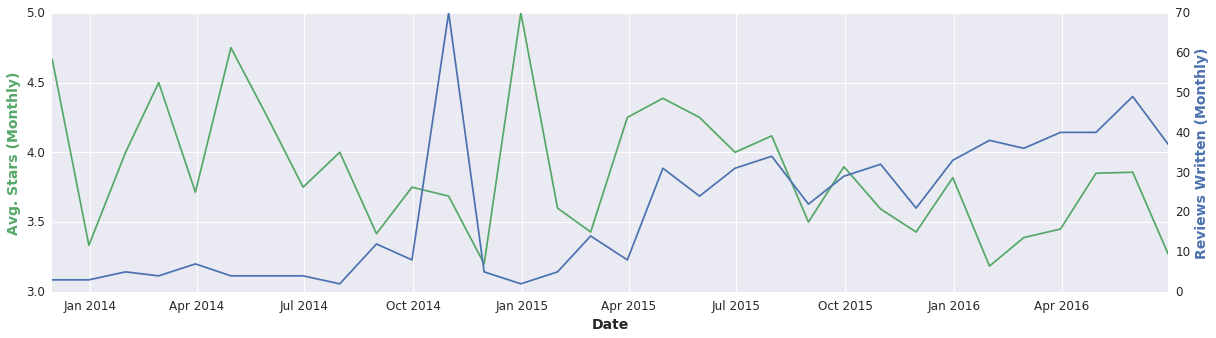

In [42]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(monthly_summary.index, monthly_summary['Stars'], 'g-')
ax2.plot(monthly_summary.index, monthly_summary['Reviews_Written'], 'b-')

ax1.set_xlabel('Date', fontsize=14, weight='bold')
ax1.set_ylabel('Avg. Stars (Monthly)', color='g', fontsize=14, weight='bold')
ax2.set_ylabel('Reviews Written (Monthly)', color='b', fontsize=14, weight='bold')

ax1.tick_params(axis='both', labelsize=12)
ax2.tick_params(axis='both', labelsize=12)

plt.grid()

#plt.show()
plt.rcParams['figure.figsize'] = 20,5

plt.savefig('Monthly_AvgStars_vs_Reviews')

In [113]:
avg_review_length_df = pd.DataFrame(all_reviews_df.groupby('Stars')['Review_Length'].mean())

In [114]:
avg_review_length_df.head()

,Review_Length
Stars,
1,163.000000
2,181.779221
3,198.687500
4,152.595000
5,222.780000


In [117]:
#avg_review_length_df.to_csv('avg_rev_length.csv', index_label='Star Rating')

## Create Clean Reviews List

In [43]:
clean_reviews = []
for review in clean_5S_reviews:
    clean_reviews.append(review)
for review in clean_4S_reviews:
    clean_reviews.append(review)
for review in clean_3S_reviews:
    clean_reviews.append(review)
for review in clean_2S_reviews:
    clean_reviews.append(review)
for review in clean_1S_reviews:
    clean_reviews.append(review)
print len(clean_reviews)

670


## Create Stop Words List

In [175]:
punctuation = list(string.punctuation)
stop = stopwords.words('english') + punctuation + ["''", "'s", "'m", 'I', "``", 'I\\', 'u', '...', "'ve", 'It', "n't",
                                                   "--", "n", "i\\", "..", "type=", "value=", "class=", "you\\u2019re",
                                                   "didn\\u2019t", "tuft", "needle", "i", "it", "it\\", "that\\", "ca", "bed",
                                                   "mattress", "mattresses", "wife", "husband", "amazon"]

## Tokenize Each Clean Review

In [ ]:
#texts = [[word for word in document.lower().split() if word not in stop] for document in clean_reviews]

In [176]:
texts = [[word for word in word_tokenize(document.lower()) if word not in stop] for document in clean_reviews]

## Remove Words that Appear Only Once

In [177]:
frequency = defaultdict(int)
for text in texts:
    for tkn in text:
        frequency[tkn] += 1
texts = [[tkn for tkn in text if frequency[tkn] > 1] for text in texts]

## View Bigrams

In [47]:
terms_flatten = [y for x in texts for y in x]

In [51]:
terms_bigram = bigrams(terms_flatten)

count_bigrams = Counter()
count_bigrams.update(terms_bigram)

most_common_bigrams = count_bigrams.most_common(15)

In [54]:
for bigram in most_common_bigrams:
    print bigram
    print bigram[1]

(('memory', 'foam'), 160)
160
(('customer', 'service'), 146)
146
(('foam', 'mattress'), 116)
116
(('back', 'pain'), 85)
85
(('new', 'mattress'), 75)
75
(('firm', 'mattress'), 70)
70
(('side', 'sleeper'), 66)
66
(('mattress', 'topper'), 65)
65
(('old', 'mattress'), 54)
54
(('return', 'policy'), 54)
54
(('feel', 'like'), 51)
51
(('first', 'night'), 47)
47
(('mattress', 'firm'), 46)
46
(('king', 'size'), 46)
46
(('spring', 'mattress'), 45)
45


In [101]:
most_common_bigrams[1][0]

('customer', 'service')

In [91]:
bigrams_df = pd.DataFrame(np.arange(15))

In [93]:
bigrams_df['bigrams'] = 'replace'

In [103]:
bigrams_df['count'] = 0

In [102]:
for i in xrange(len(bigrams_df)):
    bigrams_df['bigrams'][i] = most_common_bigrams[i][0]

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [104]:
for i in xrange(len(bigrams_df)):
    bigrams_df['count'][i] = most_common_bigrams[i][1]

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [107]:
del bigrams_df[0]

In [108]:
bigrams_df.head()

,bigrams,count
0,"(memory, foam)",160
1,"(customer, service)",146
2,"(foam, mattress)",116
3,"(back, pain)",85
4,"(new, mattress)",75


In [110]:
#bigrams_df.to_csv('TN_Top_Bigrams.csv', index=False, sep='\t')

## Create Dictionary of Words from Reviews

In [178]:
dictionary = Dictionary(texts)

In [179]:
print dictionary

Dictionary(3319 unique tokens: [u'limited', u'personally', u'unfurl', u'dynasty', u'four']...)


## Create Corpus from Reviews

In [180]:
corpus = [dictionary.doc2bow(text) for text in texts]

## TF-IDF

In [181]:
tfidf = TfidfModel(corpus)

In [182]:
corpus_tfidf = tfidf[corpus]

## Find Optimal Number of Topics - Credit: [Salmon Run Blog](http://sujitpal.blogspot.com/2014/08/topic-modeling-with-gensim-over-past.html)

In [183]:
lsi = LsiModel(corpus_tfidf, id2word=dictionary, num_topics=2) 
corpus_lsi = lsi[corpus_tfidf]

In [185]:
# write out coordinates to file
fcoords = open("coords.csv", 'wb')
for vector in lsi[corpus]:
    if len(vector) != 2:
        continue
    fcoords.write("%6.4f\t%6.4f\n" % (vector[0][1], vector[1][1]))
fcoords.close()

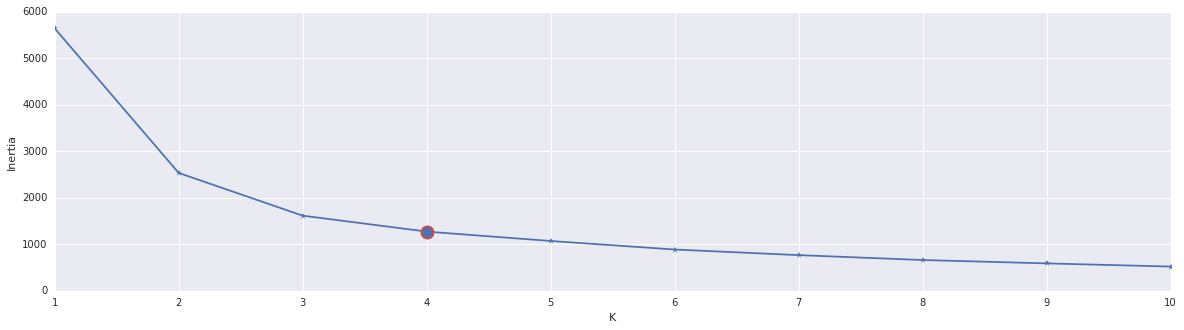

In [186]:
from sklearn.cluster import KMeans

MAX_K = 10

X = np.loadtxt("coords.csv", delimiter="\t")
ks = range(1, MAX_K + 1)

inertias = np.zeros(MAX_K)
diff = np.zeros(MAX_K)
diff2 = np.zeros(MAX_K)
diff3 = np.zeros(MAX_K)
for k in ks:
    kmeans = KMeans(k).fit(X)
    inertias[k - 1] = kmeans.inertia_
    # first difference    
    if k > 1:
        diff[k - 1] = inertias[k - 1] - inertias[k - 2]
    # second difference
    if k > 2:
        diff2[k - 1] = diff[k - 1] - diff[k - 2]
    # third difference
    if k > 3:
        diff3[k - 1] = diff2[k - 1] - diff2[k - 2]

elbow = np.argmin(diff3[3:]) + 3

plt.plot(ks, inertias, "b*-")
plt.plot(ks[elbow], inertias[elbow], marker='o', markersize=12,
         markeredgewidth=2, markeredgecolor='r', markerfacecolor=None)
plt.ylabel("Inertia")
plt.xlabel("K")
plt.show()

## Build LDA Model

In [187]:
lda = LdaModel(corpus_tfidf, id2word=dictionary, num_topics=4, passes=1, alpha='auto', iterations=30)

#double wrapper over the original corpus: bow->tfidf->fold-in-lda
corpus_lda = lda[corpus_tfidf] 

## Build LDA Topic Modeling Viz

In [188]:
vis_data = gensimvis.prepare(lda, corpus, dictionary)
pyLDAvis.display(vis_data)

In [189]:
#pyLDAvis.save_html(vis_data, 'TN_Topic_Modeling_vis.html')